In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [15]:
data = pd.read_csv("emails.csv")
data

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [17]:
data.dtypes

Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object

In [18]:
data.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [19]:
# Remove Email no. column
x = data.iloc[:,1:3001]
x.head()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0


In [20]:
# Output Class
y = data.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Prediction, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2 ,random_state=12)
x_test

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
4075,2,1,3,0,1,2,13,1,0,3,...,0,0,0,0,0,0,0,0,0,0
4835,10,7,3,8,3,5,99,0,0,14,...,0,0,0,0,1,0,0,0,6,0
4439,6,5,4,2,0,9,57,3,1,0,...,0,0,0,0,0,0,0,0,0,0
3910,4,5,5,1,3,2,44,0,2,5,...,0,0,0,0,0,0,0,0,0,0
2398,0,1,1,0,4,0,14,0,0,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18,11,16,7,5,3,126,1,14,29,...,0,0,0,0,0,0,0,0,0,0
2513,0,4,1,2,0,0,27,0,1,6,...,0,0,0,0,0,0,0,0,0,0
1662,2,4,2,3,1,1,104,0,0,18,...,0,0,0,0,1,0,0,0,3,0
3810,7,2,1,2,1,1,26,0,1,3,...,0,0,0,0,0,0,0,0,0,0


In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [30]:
#K-NN classifier 
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knn.fit(x_train, y_train) 

KNeighborsClassifier()

In [31]:
y_pred_knn = knn.predict(x_test)
y_pred_knn

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [32]:
cm = confusion_matrix(y_test, y_pred_knn)
cm

array([[586, 113],
       [ 24, 312]], dtype=int64)

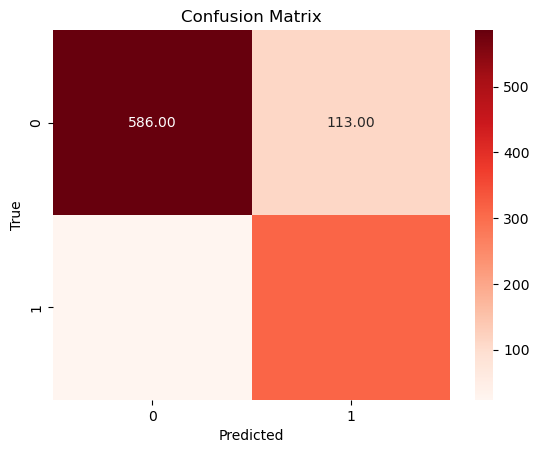

In [33]:
#Confusion matrix
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Reds') 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [35]:
#Accuracy Score
accuracy_score(y_test, y_pred_knn)

0.8676328502415459

In [36]:
#Support Vector Machine
from sklearn.svm import SVC
svc = SVC(kernel='linear', random_state=0)  
svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [37]:
y_pred_svc = svc.predict(x_test)
y_pred_svc

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [38]:
cm = confusion_matrix(y_test, y_pred_svc)
cm

array([[685,  14],
       [ 44, 292]], dtype=int64)

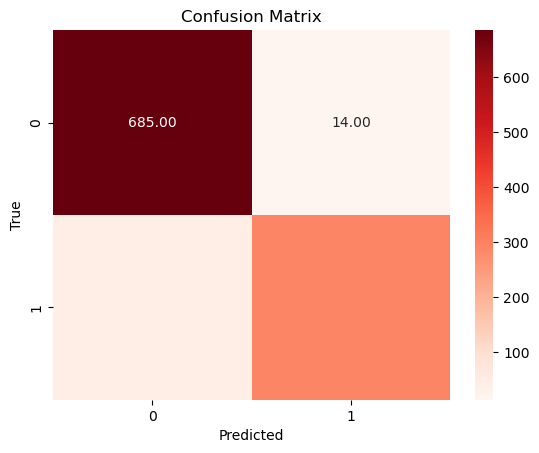

In [40]:
# Confusion matrix
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [43]:
#Accuracy score
accuracy_score(y_test, y_pred_svc)

0.9439613526570049